# EDA Project: Data Scientists and the Stack Overflow Developer Survey

## Goals
### Using the stack overflow data, answer these questions: where are data scientists working and who are they working for? How career satisfied are data scientists?

## Assumptions

## Approach

## Data Cleaning

## Identifying Relevant Questions 

## Final Recommendations

## Lessons Learned

## Further Analysis

## Code information

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
%matplotlib inline
pd.options.mode.chained_assignment = None # Turn off warnings

In [79]:
data = pd.read_csv('../data/survey_results_public.csv')

In [80]:
data.shape

(51392, 154)

In [81]:
narrow_data = data[['Professional', 'Country', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
               'CompanySize', 'CompanyType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction']]
narrow_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0


In [82]:
def find_ds(a_string):
    '''Takes a string and looks for the words "Data scientist", if so, returns the row'''
    try:
        if re.search(r'Data scientist', a_string):
            return 1
        else:
            return 0
    except:
        return 0

In [83]:
narrow_data['DataScientist'] = narrow_data['NonDeveloperType'].apply(find_ds)
narrow_data.head()

,Professional,Country,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,DataScientist
0,Student,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Student,United Kingdom,Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,NaN,0
2,Professional developer,United Kingdom,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,NaN,8.0,9.0,0
3,Professional non-developer who sometimes write...,United States,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,Data scientist,6.0,3.0,1
4,Professional developer,Switzerland,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",NaN,6.0,8.0,0


In [84]:
ds_data = narrow_data[narrow_data.DataScientist == 1]
non_ds_data = narrow_data[narrow_data.DataScientist == 0]

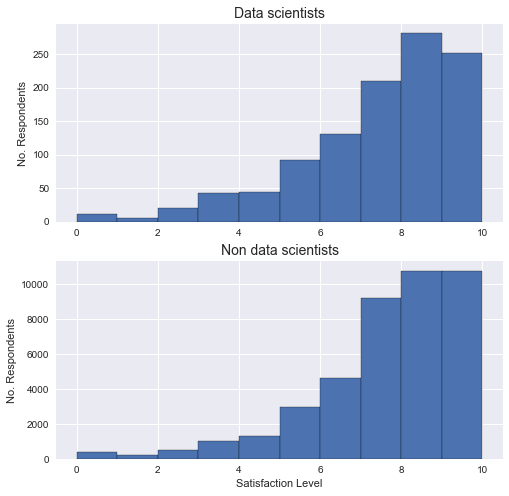

In [85]:
f, ax = plt.subplots(2, sharex=False, figsize=(8,8))

ax[0].hist(ds_data['CareerSatisfaction'].dropna(axis=0), edgecolor='k')
ax[0].set_title('Data scientists', fontsize=14)
ax[0].set_ylabel('No. Respondents')

ax[1].hist(non_ds_data['CareerSatisfaction'].dropna(axis=0), edgecolor='k')
ax[1].set_title('Non data scientists', fontsize=14)
ax[1].set_ylabel('No. Respondents')
ax[1].set_xlabel('Satisfaction Level')

#### The satisfaction levels of data scientists and non data scientists seem to be about the same -- data scientists are no more or less satisfied with their career than other developers.

In [86]:
ds_countries = ds_data.groupby('Country')['Professional'].count().reset_index()
ds_countries.columns = ['Country', 'Number']
ds_countries.set_index('Country', inplace=True)
ds_countries = ds_countries.sort_values(['Number'], axis=0, ascending=False)

In [87]:
nonds_countries = non_ds_data.groupby('Country')['Professional'].count().reset_index()
nonds_countries.columns = ['Country', 'Number']
nonds_countries.set_index('Country', inplace=True)
nonds_countries = nonds_countries.sort_values(['Number'], axis=0, ascending=False)

In [88]:
ds_countries = ds_countries[ds_countries.Number >= 10]
nonds_countries = nonds_countries[nonds_countries.Number >= 400]

In [89]:
ds_countries.head()

,Number
Country,
United States,271
Germany,121
United Kingdom,92
India,52
Canada,38


In [90]:
nonds_countries.head()

,Number
Country,
United States,11184
India,5145
United Kingdom,4303
Germany,4022
Canada,2195


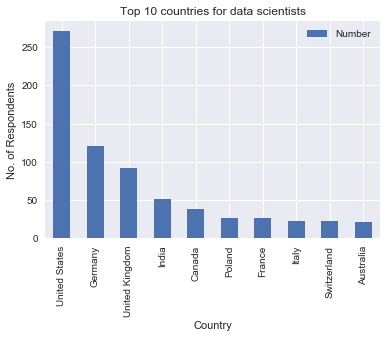

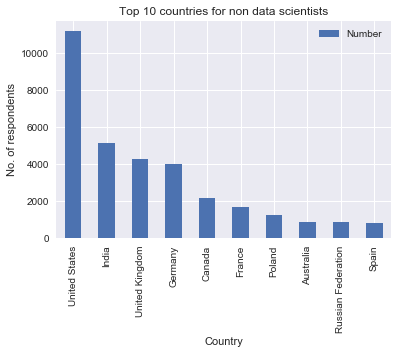

In [95]:
plt.figure(figsize=(10, 15))
ax = ds_countries[:10].plot(kind='bar')
ax.set_title('Top 10 countries for data scientists')
ax.set_ylabel('No. of Respondents')

ax = nonds_countries[:10].plot(kind='bar')
ax.set_title('Top 10 countries for non data scientists')
ax.set_ylabel('No. of respondents')

#### Data scientists seem to follow a similar geographic desitribution as non-data scientists - most of the top ten countries for data scientists are also in the top ten list of countries for non-data scientists. 